In [2]:
#Using Normalize Function
# Import Libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.cluster.hierarchy as sch
from sklearn.cluster import AgglomerativeClustering
from sklearn.preprocessing import normalize

In [5]:
#importing dataset
airline = pd.read_csv(r"C:\Users\neetac1973\Downloads\EastWestAirlines.csv")

In [6]:
airline

,ID#,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,1,28143,0,1,1,1,174,1,0,0,7000,0
1,2,19244,0,1,1,1,215,2,0,0,6968,0
2,3,41354,0,1,1,1,4123,4,0,0,7034,0
3,4,14776,0,1,1,1,500,1,0,0,6952,0
4,5,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,4017,18476,0,1,1,1,8525,4,200,1,1403,1
3995,4018,64385,0,1,1,1,981,5,0,0,1395,1
3996,4019,73597,0,3,1,1,25447,8,0,0,1402,1
3997,4020,54899,0,1,1,1,500,1,500,1,1401,0


In [7]:
airline.info() #gives information about dataset

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3999 entries, 0 to 3998
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype
---  ------             --------------  -----
 0   ID#                3999 non-null   int64
 1   Balance            3999 non-null   int64
 2   Qual_miles         3999 non-null   int64
 3   cc1_miles          3999 non-null   int64
 4   cc2_miles          3999 non-null   int64
 5   cc3_miles          3999 non-null   int64
 6   Bonus_miles        3999 non-null   int64
 7   Bonus_trans        3999 non-null   int64
 8   Flight_miles_12mo  3999 non-null   int64
 9   Flight_trans_12    3999 non-null   int64
 10  Days_since_enroll  3999 non-null   int64
 11  Award?             3999 non-null   int64
dtypes: int64(12)
memory usage: 375.0 KB


In [8]:
airline2=airline.drop(['ID#'],axis=1) #axis=1 means each column as a bulk
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,28143,0,1,1,1,174,1,0,0,7000,0
1,19244,0,1,1,1,215,2,0,0,6968,0
2,41354,0,1,1,1,4123,4,0,0,7034,0
3,14776,0,1,1,1,500,1,0,0,6952,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1
...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1
3995,64385,0,1,1,1,981,5,0,0,1395,1
3996,73597,0,3,1,1,25447,8,0,0,1402,1
3997,54899,0,1,1,1,500,1,500,1,1401,0


In [9]:
# Normalize heterogenous numerical data 
airline2_norm=pd.DataFrame(normalize(airline2),columns=airline2.columns)
#to scale numeric data from different columns down to an equivalent scale
airline2_norm

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
0,0.970414,0.0,0.000034,0.000034,0.000034,0.006000,0.000034,0.000000,0.000000,0.241371,0.000000
1,0.940209,0.0,0.000049,0.000049,0.000049,0.010504,0.000098,0.000000,0.000000,0.340437,0.000000
2,0.981113,0.0,0.000024,0.000024,0.000024,0.097817,0.000095,0.000000,0.000000,0.166880,0.000000
3,0.904428,0.0,0.000061,0.000061,0.000061,0.030605,0.000061,0.000000,0.000000,0.425527,0.000000
4,0.912226,0.0,0.000037,0.000009,0.000009,0.404078,0.000243,0.019383,0.000037,0.064718,0.000009
...,...,...,...,...,...,...,...,...,...,...,...
3994,0.905810,0.0,0.000049,0.000049,0.000049,0.417949,0.000196,0.009805,0.000049,0.068784,0.000049
3995,0.999649,0.0,0.000016,0.000016,0.000016,0.015231,0.000078,0.000000,0.000000,0.021659,0.000016
3996,0.944948,0.0,0.000039,0.000013,0.000013,0.326726,0.000103,0.000000,0.000000,0.018001,0.000013
3997,0.999592,0.0,0.000018,0.000018,0.000018,0.009104,0.000018,0.009104,0.000018,0.025509,0.000000


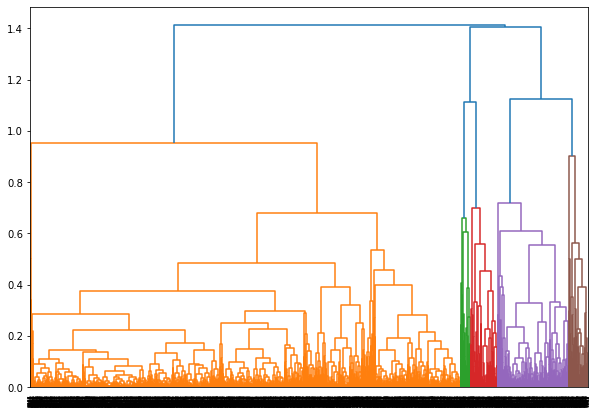

In [20]:
# Create Dendrograms
plt.figure(figsize=(10, 7))  
dendograms=sch.dendrogram(sch.linkage(airline2_norm,'complete')) # dendrogram is a diagram representing a tree

In [21]:
# Create Clusters (y)
hclusters=AgglomerativeClustering(n_clusters=5,affinity='euclidean',linkage='ward')
#affinity is metric that is used to compute linkage.
hclusters

AgglomerativeClustering(n_clusters=5)

In [22]:
y=pd.DataFrame(hclusters.fit_predict(airline2_norm),columns=['clustersid'])
y['clustersid'].value_counts()

2    1547
4    1191
3     579
1     453
0     229
Name: clustersid, dtype: int64

In [23]:
# Adding clusters to dataset
airline2['clustersid']=hclusters.labels_
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
0,28143,0,1,1,1,174,1,0,0,7000,0,4
1,19244,0,1,1,1,215,2,0,0,6968,0,2
2,41354,0,1,1,1,4123,4,0,0,7034,0,2
3,14776,0,1,1,1,500,1,0,0,6952,0,2
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3
...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3
3995,64385,0,1,1,1,981,5,0,0,1395,1,4
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2
3997,54899,0,1,1,1,500,1,500,1,1401,0,4


In [24]:
airline2.groupby('clustersid').agg(['mean']).reset_index() #reset_index() method allows to reset index

,clustersid,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,5524.222707,8.755459,1.000000,1.000000,1.000000,584.532751,2.401747,66.982533,0.209607,4875.301310,0.131004
1,1,31066.514349,111.415011,3.200883,1.026490,1.070640,40266.935982,17.289183,626.754967,1.812362,4205.624724,0.858720
2,2,81201.080802,136.521008,2.115061,1.013575,1.000646,16350.149968,13.574014,488.550743,1.340659,4285.891403,0.312217
3,3,69569.894646,97.257340,3.326425,1.032815,1.022453,35743.675302,17.784111,406.804836,1.274611,4090.832470,0.525043
4,4,94957.590260,215.220823,1.141058,1.005038,1.002519,3524.928631,5.640638,461.104954,1.521411,3736.071369,0.230898


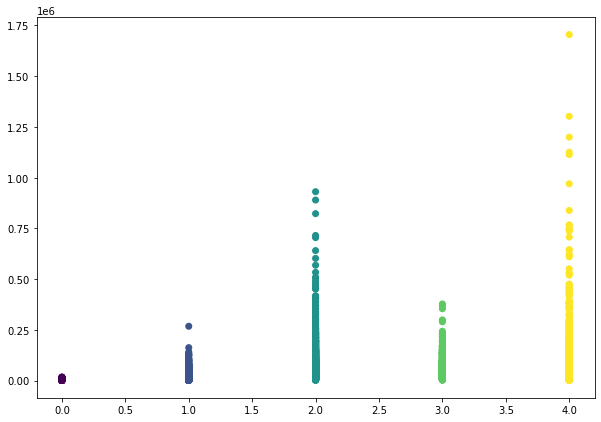

In [25]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_) #gives information through scatter plot

In [26]:
#Using K-Means
# Normalization function 
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
scaled_Airline_df = scaler.fit_transform(airline2.iloc[:,1:])

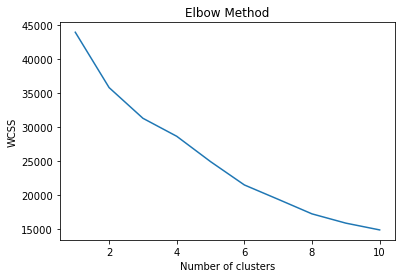

In [27]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters=i,random_state=0)
    kmeans.fit(scaled_Airline_df)
    wcss.append(kmeans.inertia_)
    
plt.plot(range(1, 11), wcss)
plt.title('Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()


In [28]:
#Build Cluster algorithm
from sklearn.cluster import KMeans
clusters_new = KMeans(4, random_state=42)
clusters_new.fit(scaled_Airline_df)

KMeans(n_clusters=4, random_state=42)

In [29]:
clusters_new.labels_ #It receives label as index of cluster it gets assigned to

array([0, 0, 0, ..., 1, 0, 0])

In [30]:
#Assign clusters to the data set
airline2['clusterid_new'] = clusters_new.labels_

In [31]:
#these are standardized values.
clusters_new.cluster_centers_

array([[-0.05446496, -0.60118689, -0.09824189, -0.06074347, -0.51629768,
        -0.49601496, -0.18013446, -0.19274362, -0.19121525, -0.34898962,
         0.16465129],
       [ 0.01633505,  1.2124657 , -0.09824189,  0.13053612,  0.96197757,
         0.77419196, -0.08433135, -0.09290668,  0.35077346,  0.58921875,
        -0.34032831],
       [-0.1562356 , -0.66822727,  9.03825361, -0.06276658, -0.10166533,
         0.61785114,  0.0875494 ,  0.22034681, -0.07246398,  0.05178388,
        -0.1963    ],
       [ 0.81477125,  0.05712234, -0.09824189, -0.06276658,  0.57895961,
         1.60901379,  3.68161394,  3.92585016,  0.27032323,  0.86795238,
         0.16079902]])

In [32]:
airline2.groupby('clusterid_new').agg(['mean']).reset_index() #involves some combination of splitting object, applying a function & combining results

,clusterid_new,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid
,,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean,mean
0,0,48876.682106,102.224466,1.228029,1.000000,1.000396,4646.003167,6.821457,208.355107,0.644101,3721.722090,0.201900,2.710214
1,1,111291.743349,156.014867,3.724570,1.000000,1.037559,40268.929577,19.013302,340.383412,1.016432,4841.564945,0.652582,2.107199
2,2,68876.581395,23.255814,1.139535,2.348837,1.000000,14689.837209,17.534884,582.627907,2.209302,3968.930233,0.395349,2.279070
3,3,168925.453947,774.394737,2.138158,1.000000,1.000000,31125.532895,27.052632,5614.440789,16.263158,4676.743421,0.789474,2.703947


In [33]:
airline2

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusterid_new
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,0
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0


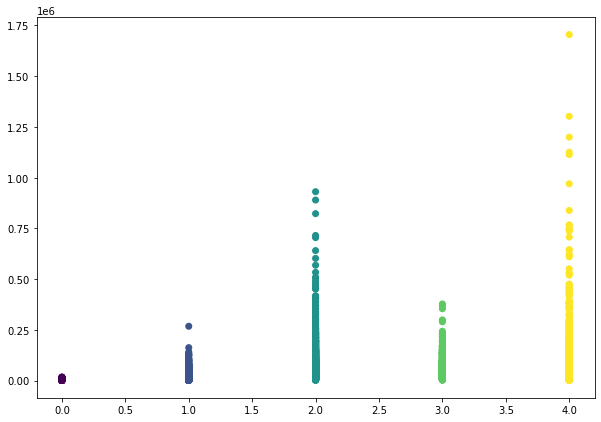

In [34]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_)

In [35]:
#Using DBScan
from sklearn.cluster import DBSCAN

array=airline2.values

array

array([[28143,     0,     1, ...,     0,     4,     0],
       [19244,     0,     1, ...,     0,     2,     0],
       [41354,     0,     1, ...,     0,     2,     0],
       ...,
       [73597,     0,     3, ...,     1,     2,     1],
       [54899,     0,     1, ...,     0,     4,     0],
       [ 3016,     0,     1, ...,     0,     2,     0]], dtype=int64)

In [36]:
stscaler = StandardScaler().fit(array)
X = stscaler.transform(array)
X

array([[-4.51140783e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00, -6.45212330e-01],
       [-5.39456874e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.45212330e-01],
       [-3.20031232e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.45212330e-01],
       ...,
       [-4.29480975e-05, -1.86298687e-01,  6.83121167e-01, ...,
         1.30391816e+00, -4.30851168e-01,  7.72482235e-01],
       [-1.85606976e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01,  1.25009890e+00, -6.45212330e-01],
       [-7.00507951e-01, -1.86298687e-01, -7.69578406e-01, ...,
        -7.66919299e-01, -4.30851168e-01, -6.45212330e-01]])

In [37]:
dbscan = DBSCAN(eps=0.8, min_samples=6) # number of neighbouring points required for point to be considered as dense region, or valid cluste
dbscan.fit(X)

DBSCAN(eps=0.8, min_samples=6)

In [38]:
#Noisy samples are given the label -1.
dbscan.labels_

array([0, 1, 1, ..., 5, 0, 1], dtype=int64)

In [39]:
Cl=pd.DataFrame(dbscan.labels_,columns=['cluster']) # its ability to detect clusters that are irregularly shaped
Cl

,cluster
0,0
1,1
2,1
3,1
4,-1
...,...
3994,-1
3995,10
3996,5
3997,0


In [41]:
pd.concat([airline2,Cl],axis=1) #Concatenate pandas objects along a particular axis.

,Balance,Qual_miles,cc1_miles,cc2_miles,cc3_miles,Bonus_miles,Bonus_trans,Flight_miles_12mo,Flight_trans_12,Days_since_enroll,Award?,clustersid,clusterid_new,cluster
0,28143,0,1,1,1,174,1,0,0,7000,0,4,0,0
1,19244,0,1,1,1,215,2,0,0,6968,0,2,0,1
2,41354,0,1,1,1,4123,4,0,0,7034,0,2,0,1
3,14776,0,1,1,1,500,1,0,0,6952,0,2,0,1
4,97752,0,4,1,1,43300,26,2077,4,6935,1,3,1,-1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3994,18476,0,1,1,1,8525,4,200,1,1403,1,3,0,-1
3995,64385,0,1,1,1,981,5,0,0,1395,1,4,0,10
3996,73597,0,3,1,1,25447,8,0,0,1402,1,2,1,5
3997,54899,0,1,1,1,500,1,500,1,1401,0,4,0,0


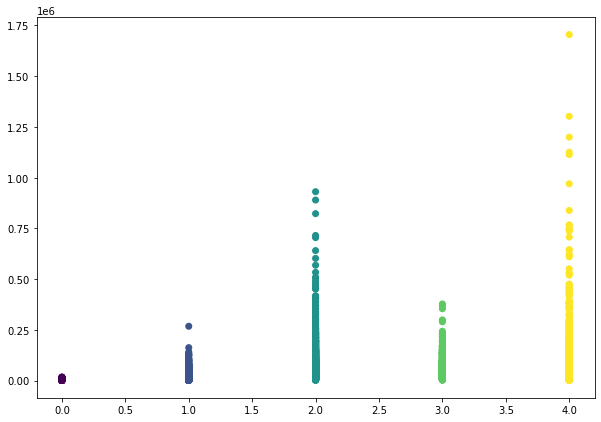

In [42]:
# Plot Clusters
plt.figure(figsize=(10, 7))  
plt.scatter(airline2['clustersid'],airline2['Balance'], c=hclusters.labels_)